<a href="https://colab.research.google.com/github/akanshu11sharma/analysis_project/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uploading the csv file
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [ ]:
# Step 2: Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Reading the dataset
df = pd.read_csv("Advertising.csv")

# Displaying the first 5 rows
print("🔹 First 5 Rows of the Dataset:")
display(df.head())


🔹 First 5 Rows of the Dataset:


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Checking for missing values and basic info
print("🔹 Dataset Information:")
print(df.info())

print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Summary Statistics:")
print(df.describe())


🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

🔹 Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

🔹 Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


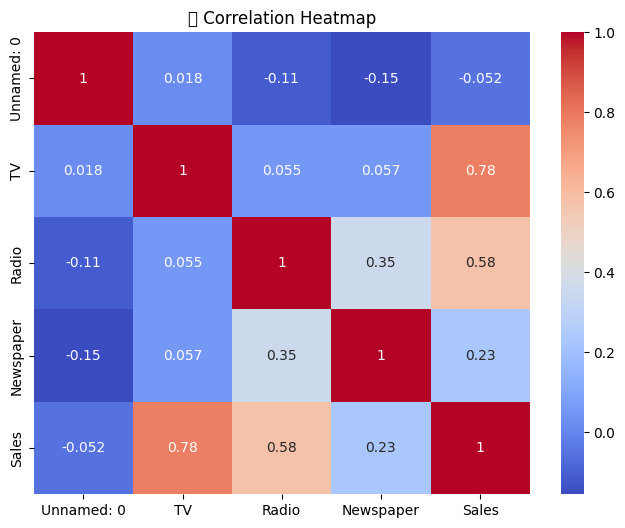

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


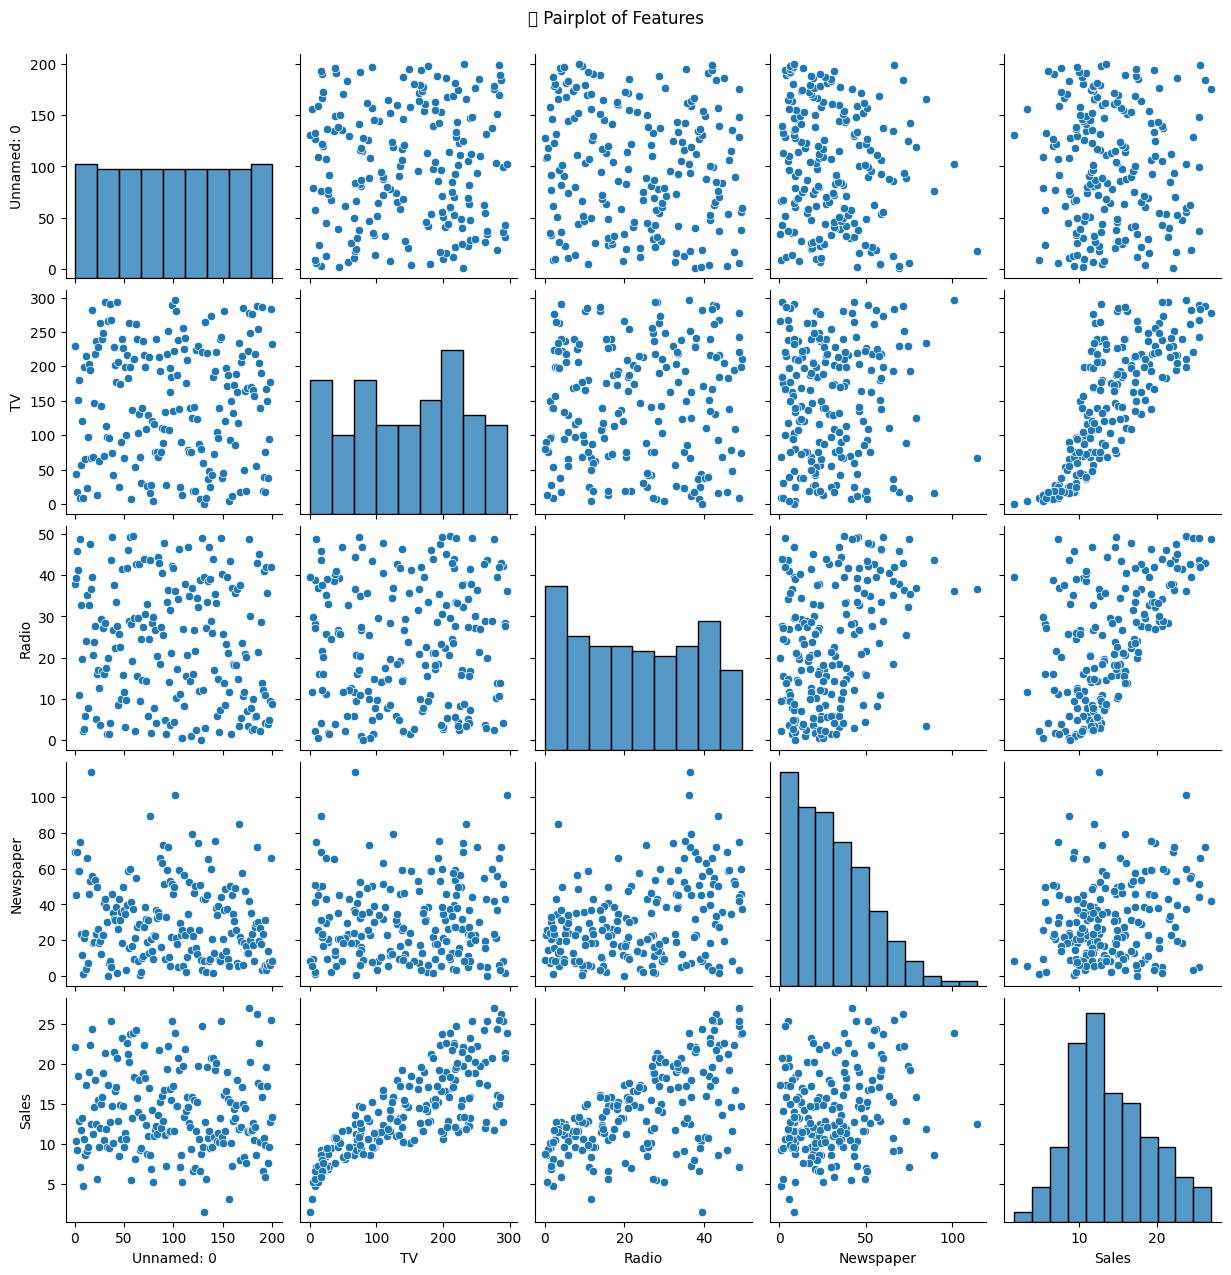

In [ ]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("🔹 Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(df)
plt.suptitle("🔹 Pairplot of Features", y=1.02)
plt.show()


In [ ]:
# Preparing Data for Linear Regression
X = df[['TV', 'Radio', 'Newspaper']]   # Features
y = df['Sales']                        # Target

# Splitting into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
print("🔹 Model Coefficients:", model.coef_)
print("🔹 Model Intercept:", model.intercept_)


🔹 Model Coefficients: [0.04472952 0.18919505 0.00276111]
🔹 Model Intercept: 2.979067338122629


In [ ]:
# Making Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Mean Squared Error (MSE):", mse)
print("🔹 R² Score:", r2)


🔹 Mean Squared Error (MSE): 3.1740973539761033
🔹 R² Score: 0.899438024100912


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


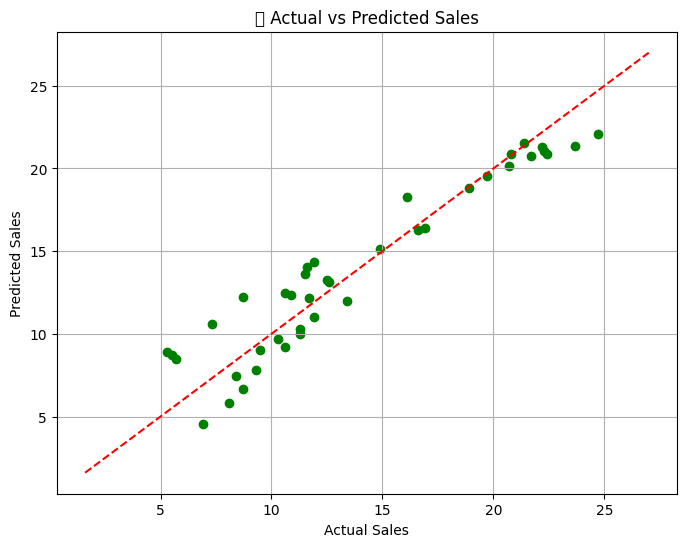

In [ ]:
# Visualization - Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("🔹 Actual vs Predicted Sales")
plt.grid(True)
plt.show()
